Imports

In [1]:
import descarteslabs as dl
import numpy as np
from descarteslabs import get_settings

DesCartes - Easy way to display satellite maps and layer them
            
            Can be slow to generate maps, scenes arent all encompassing, can be hard to find

Usage of

    https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l1c/

and

    https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2

Allows access to satellite data, I used Earth Engine here.

### Finds Coords of location, specifies dataset and searches for scenes in given timeframe, displays findings

In [2]:
Map = {
    'type': 'Polygon',
    'coordinates': [
        [[-95.27841503861751, 42.76556057019057],
         [-93.15675252485482, 42.36289849433184],
         [-93.73350276458868, 40.73810018004927],
         [-95.79766011799035, 41.13809376845988],
         [-95.27841503861751, 42.76556057019057]]
    ]
}

scenes, ctx = dl.scenes.search(
    Map,
    products=["landsat:LC08:PRE:TOAR"],
    start_datetime='2000-04-01',
    end_datetime='2022-10-01',
    sort_field='identifier',
)

scenes



SceneCollection of 2 scenes
  * Dates: Jul 06, 2016 to Jul 15, 2016
  * Products: landsat:LC08:PRE:TOAR: 2

### Creates scene stack and displays it within given parameters

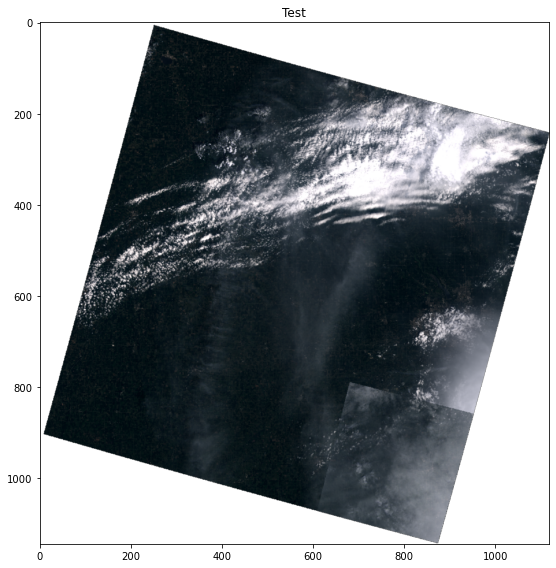

In [3]:
ndarray_stack = scenes.stack(
    "red green blue",
    ctx.assign(resolution = 200)
)

ndarray_stack.shape

composite = np.ma.median(ndarray_stack, axis = 0)

dl.scenes.display(composite, title = 'Test', size=8)